## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  89.969320   261.199760  0.891508   6.583938  1.306892
1  60.135037   513.651298  0.560250   1.071464  1.491563
2  67.135248   560.401050  0.671596   4.118152  1.337146
3  52.887552  1400.357613  0.634284  10.696188  1.390255
4  25.674276  1365.189223  0.913617   2.495683  1.753041


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0359865	total: 64.8ms	remaining: 1m 4s
1:	learn: 1.0252739	total: 65.8ms	remaining: 32.8s
2:	learn: 1.0163360	total: 68.4ms	remaining: 22.7s
3:	learn: 1.0056483	total: 68.9ms	remaining: 17.2s
4:	learn: 0.9961998	total: 70.1ms	remaining: 13.9s
5:	learn: 0.9873626	total: 70.6ms	remaining: 11.7s
6:	learn: 0.9787724	total: 70.9ms	remaining: 10.1s
7:	learn: 0.9674632	total: 71.4ms	remaining: 8.86s
8:	learn: 0.9582168	total: 72ms	remaining: 7.92s
9:	learn: 0.9495008	total: 72.3ms	remaining: 7.16s
10:	learn: 0.9407305	total: 72.9ms	remaining: 6.55s
11:	learn: 0.9329054	total: 73.5ms	remaining: 6.05s
12:	learn: 0.9231713	total: 73.9ms	remaining: 5.61s
13:	learn: 0.9154877	total: 74.5ms	remaining: 5.25s
14:	learn: 0.9074433	total: 75ms	remaining: 4.93s


15:	learn: 0.8993269	total: 76ms	remaining: 4.67s
16:	learn: 0.8911213	total: 76.5ms	remaining: 4.42s
17:	learn: 0.8847501	total: 77ms	remaining: 4.2s
18:	learn: 0.8762248	total: 77.4ms	remaining: 4s
19:	learn: 0.8686285	total: 77.7ms	remaining: 3.81s
20:	learn: 0.8613778	total: 78.2ms	remaining: 3.65s
21:	learn: 0.8549208	total: 78.8ms	remaining: 3.5s
22:	learn: 0.8484167	total: 79.3ms	remaining: 3.37s
23:	learn: 0.8420613	total: 79.8ms	remaining: 3.24s
24:	learn: 0.8354271	total: 80.2ms	remaining: 3.13s
25:	learn: 0.8291667	total: 80.6ms	remaining: 3.02s
26:	learn: 0.8211958	total: 81.1ms	remaining: 2.92s
27:	learn: 0.8140292	total: 81.6ms	remaining: 2.83s
28:	learn: 0.8073054	total: 82.1ms	remaining: 2.75s
29:	learn: 0.8003819	total: 82.5ms	remaining: 2.67s
30:	learn: 0.7946126	total: 82.9ms	remaining: 2.59s
31:	learn: 0.7881806	total: 83.4ms	remaining: 2.52s
32:	learn: 0.7837489	total: 83.6ms	remaining: 2.45s
33:	learn: 0.7759395	total: 84.2ms	remaining: 2.39s
34:	learn: 0.7712749	

204:	learn: 0.2875771	total: 161ms	remaining: 625ms
205:	learn: 0.2861730	total: 162ms	remaining: 623ms
206:	learn: 0.2856762	total: 163ms	remaining: 624ms
207:	learn: 0.2846991	total: 165ms	remaining: 628ms
208:	learn: 0.2834266	total: 166ms	remaining: 628ms
209:	learn: 0.2822459	total: 167ms	remaining: 627ms
210:	learn: 0.2805470	total: 168ms	remaining: 627ms
211:	learn: 0.2792164	total: 168ms	remaining: 626ms
212:	learn: 0.2785434	total: 169ms	remaining: 624ms
213:	learn: 0.2770195	total: 170ms	remaining: 623ms
214:	learn: 0.2756789	total: 170ms	remaining: 621ms
215:	learn: 0.2744830	total: 171ms	remaining: 620ms
216:	learn: 0.2734960	total: 171ms	remaining: 619ms
217:	learn: 0.2723654	total: 172ms	remaining: 617ms
218:	learn: 0.2711930	total: 174ms	remaining: 622ms
219:	learn: 0.2702586	total: 175ms	remaining: 621ms
220:	learn: 0.2690583	total: 176ms	remaining: 620ms
221:	learn: 0.2683252	total: 177ms	remaining: 619ms
222:	learn: 0.2667864	total: 177ms	remaining: 617ms
223:	learn: 

245:	learn: 0.2441003	total: 190ms	remaining: 583ms
246:	learn: 0.2430878	total: 191ms	remaining: 581ms
247:	learn: 0.2421257	total: 199ms	remaining: 602ms
248:	learn: 0.2412015	total: 199ms	remaining: 600ms
249:	learn: 0.2409799	total: 200ms	remaining: 599ms
250:	learn: 0.2400944	total: 200ms	remaining: 597ms
251:	learn: 0.2389982	total: 200ms	remaining: 595ms
252:	learn: 0.2387324	total: 201ms	remaining: 594ms
253:	learn: 0.2376990	total: 202ms	remaining: 592ms
254:	learn: 0.2362228	total: 202ms	remaining: 590ms
255:	learn: 0.2352929	total: 202ms	remaining: 588ms
256:	learn: 0.2339666	total: 203ms	remaining: 587ms
257:	learn: 0.2328235	total: 203ms	remaining: 585ms
258:	learn: 0.2319163	total: 204ms	remaining: 583ms
259:	learn: 0.2304771	total: 204ms	remaining: 581ms
260:	learn: 0.2294734	total: 205ms	remaining: 580ms
261:	learn: 0.2291084	total: 205ms	remaining: 578ms
262:	learn: 0.2279196	total: 206ms	remaining: 577ms
263:	learn: 0.2272518	total: 206ms	remaining: 575ms
264:	learn: 

411:	learn: 0.1265132	total: 275ms	remaining: 392ms
412:	learn: 0.1260816	total: 275ms	remaining: 391ms
413:	learn: 0.1257862	total: 276ms	remaining: 390ms
414:	learn: 0.1253615	total: 276ms	remaining: 389ms
415:	learn: 0.1250703	total: 276ms	remaining: 388ms
416:	learn: 0.1246867	total: 277ms	remaining: 387ms
417:	learn: 0.1243406	total: 277ms	remaining: 386ms
418:	learn: 0.1240557	total: 278ms	remaining: 385ms
419:	learn: 0.1237760	total: 278ms	remaining: 384ms
420:	learn: 0.1231104	total: 279ms	remaining: 384ms
421:	learn: 0.1228414	total: 279ms	remaining: 383ms
422:	learn: 0.1224278	total: 280ms	remaining: 382ms
423:	learn: 0.1218547	total: 281ms	remaining: 382ms
424:	learn: 0.1214483	total: 282ms	remaining: 381ms
425:	learn: 0.1211851	total: 282ms	remaining: 380ms
426:	learn: 0.1206292	total: 283ms	remaining: 380ms
427:	learn: 0.1202288	total: 284ms	remaining: 379ms
428:	learn: 0.1199724	total: 284ms	remaining: 378ms
429:	learn: 0.1192604	total: 284ms	remaining: 377ms
430:	learn: 

527:	learn: 0.0803963	total: 332ms	remaining: 297ms
528:	learn: 0.0800913	total: 333ms	remaining: 296ms
529:	learn: 0.0797874	total: 333ms	remaining: 295ms
530:	learn: 0.0796478	total: 334ms	remaining: 295ms
531:	learn: 0.0793948	total: 334ms	remaining: 294ms
532:	learn: 0.0792121	total: 334ms	remaining: 293ms
533:	learn: 0.0787394	total: 335ms	remaining: 292ms
534:	learn: 0.0784164	total: 335ms	remaining: 291ms
535:	learn: 0.0781318	total: 336ms	remaining: 290ms
536:	learn: 0.0778390	total: 336ms	remaining: 290ms
537:	learn: 0.0776121	total: 336ms	remaining: 289ms
538:	learn: 0.0774774	total: 337ms	remaining: 288ms
539:	learn: 0.0774227	total: 337ms	remaining: 287ms
540:	learn: 0.0771465	total: 338ms	remaining: 287ms
541:	learn: 0.0768224	total: 339ms	remaining: 286ms
542:	learn: 0.0766165	total: 339ms	remaining: 285ms
543:	learn: 0.0764860	total: 339ms	remaining: 284ms
544:	learn: 0.0760371	total: 340ms	remaining: 284ms
545:	learn: 0.0757670	total: 340ms	remaining: 283ms
546:	learn: 

649:	learn: 0.0527181	total: 399ms	remaining: 215ms
650:	learn: 0.0525395	total: 400ms	remaining: 214ms
651:	learn: 0.0524677	total: 400ms	remaining: 214ms
652:	learn: 0.0522728	total: 401ms	remaining: 213ms
653:	learn: 0.0521511	total: 402ms	remaining: 212ms
654:	learn: 0.0519872	total: 402ms	remaining: 212ms
655:	learn: 0.0517998	total: 402ms	remaining: 211ms
656:	learn: 0.0517305	total: 403ms	remaining: 210ms
657:	learn: 0.0515725	total: 404ms	remaining: 210ms
658:	learn: 0.0513839	total: 404ms	remaining: 209ms
659:	learn: 0.0513164	total: 404ms	remaining: 208ms
660:	learn: 0.0511371	total: 405ms	remaining: 208ms
661:	learn: 0.0511113	total: 405ms	remaining: 207ms
662:	learn: 0.0509908	total: 406ms	remaining: 206ms
663:	learn: 0.0508420	total: 406ms	remaining: 205ms
664:	learn: 0.0507239	total: 406ms	remaining: 205ms
665:	learn: 0.0505873	total: 407ms	remaining: 204ms
666:	learn: 0.0504710	total: 407ms	remaining: 203ms
667:	learn: 0.0502665	total: 408ms	remaining: 203ms
668:	learn: 

782:	learn: 0.0334661	total: 462ms	remaining: 128ms
783:	learn: 0.0333419	total: 462ms	remaining: 127ms
784:	learn: 0.0332625	total: 463ms	remaining: 127ms
785:	learn: 0.0331417	total: 463ms	remaining: 126ms
786:	learn: 0.0330219	total: 464ms	remaining: 125ms
787:	learn: 0.0328912	total: 464ms	remaining: 125ms
788:	learn: 0.0328141	total: 465ms	remaining: 124ms
789:	learn: 0.0327709	total: 465ms	remaining: 124ms
790:	learn: 0.0326952	total: 466ms	remaining: 123ms
791:	learn: 0.0326304	total: 466ms	remaining: 122ms
792:	learn: 0.0325562	total: 467ms	remaining: 122ms
793:	learn: 0.0325114	total: 467ms	remaining: 121ms
794:	learn: 0.0323939	total: 467ms	remaining: 121ms
795:	learn: 0.0323213	total: 468ms	remaining: 120ms
796:	learn: 0.0322499	total: 469ms	remaining: 119ms
797:	learn: 0.0322060	total: 469ms	remaining: 119ms
798:	learn: 0.0320837	total: 469ms	remaining: 118ms
799:	learn: 0.0319637	total: 470ms	remaining: 118ms
800:	learn: 0.0318459	total: 471ms	remaining: 117ms
801:	learn: 

898:	learn: 0.0231972	total: 528ms	remaining: 59.3ms
899:	learn: 0.0231540	total: 528ms	remaining: 58.7ms
900:	learn: 0.0231101	total: 529ms	remaining: 58.1ms
901:	learn: 0.0230675	total: 529ms	remaining: 57.5ms
902:	learn: 0.0230242	total: 530ms	remaining: 56.9ms
903:	learn: 0.0229002	total: 531ms	remaining: 56.3ms
904:	learn: 0.0228292	total: 531ms	remaining: 55.8ms
905:	learn: 0.0227875	total: 541ms	remaining: 56.2ms


906:	learn: 0.0227302	total: 542ms	remaining: 55.6ms
907:	learn: 0.0226891	total: 542ms	remaining: 54.9ms
908:	learn: 0.0226328	total: 543ms	remaining: 54.4ms
909:	learn: 0.0225590	total: 543ms	remaining: 53.7ms
910:	learn: 0.0224921	total: 544ms	remaining: 53.1ms
911:	learn: 0.0224511	total: 544ms	remaining: 52.5ms
912:	learn: 0.0223907	total: 545ms	remaining: 51.9ms
913:	learn: 0.0223451	total: 545ms	remaining: 51.3ms
914:	learn: 0.0222858	total: 546ms	remaining: 50.7ms
915:	learn: 0.0221756	total: 546ms	remaining: 50.1ms
916:	learn: 0.0221359	total: 547ms	remaining: 49.5ms
917:	learn: 0.0220556	total: 549ms	remaining: 49.1ms


918:	learn: 0.0220157	total: 550ms	remaining: 48.4ms
919:	learn: 0.0219549	total: 550ms	remaining: 47.8ms
920:	learn: 0.0219156	total: 551ms	remaining: 47.2ms
921:	learn: 0.0218095	total: 551ms	remaining: 46.6ms
922:	learn: 0.0217571	total: 552ms	remaining: 46ms
923:	learn: 0.0216975	total: 552ms	remaining: 45.4ms
924:	learn: 0.0216466	total: 552ms	remaining: 44.8ms
925:	learn: 0.0215880	total: 553ms	remaining: 44.2ms
926:	learn: 0.0215241	total: 553ms	remaining: 43.6ms
927:	learn: 0.0214222	total: 558ms	remaining: 43.3ms
928:	learn: 0.0213728	total: 558ms	remaining: 42.6ms
929:	learn: 0.0213225	total: 558ms	remaining: 42ms
930:	learn: 0.0212100	total: 559ms	remaining: 41.4ms
931:	learn: 0.0211114	total: 559ms	remaining: 40.8ms
932:	learn: 0.0210154	total: 560ms	remaining: 40.2ms
933:	learn: 0.0209689	total: 560ms	remaining: 39.6ms
934:	learn: 0.0209085	total: 561ms	remaining: 39ms
935:	learn: 0.0208153	total: 561ms	remaining: 38.4ms
936:	learn: 0.0207562	total: 562ms	remaining: 37.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4704133952247183


ABC Pre-generator MAE 1.3295042362886698


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

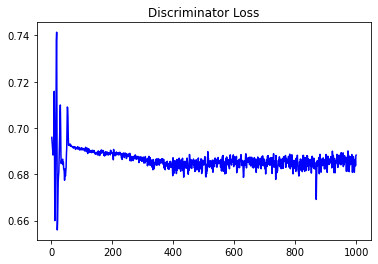

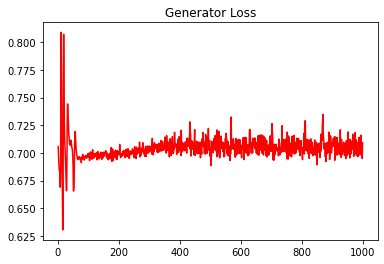

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.44850048920838165


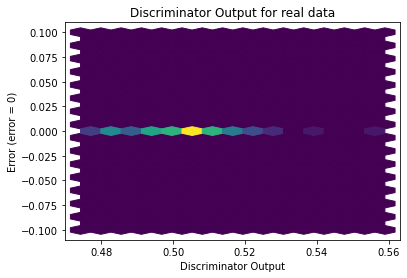

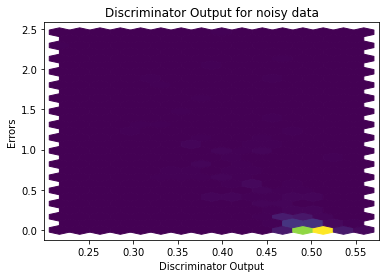

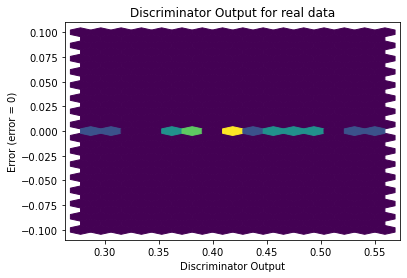

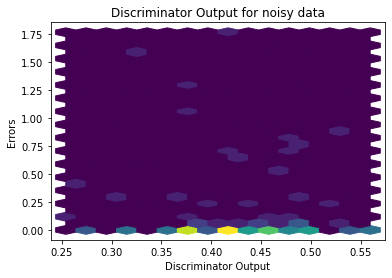

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

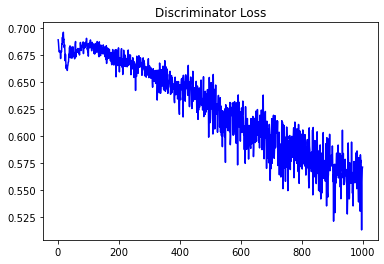

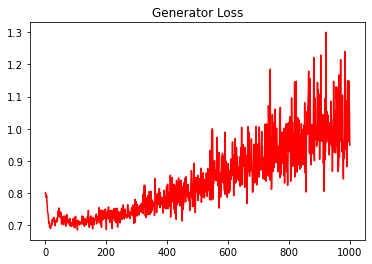

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5011935022519901


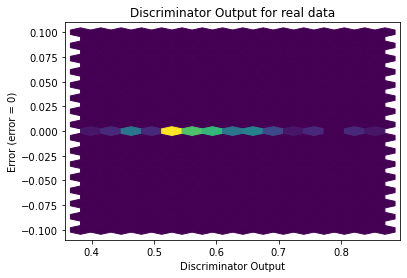

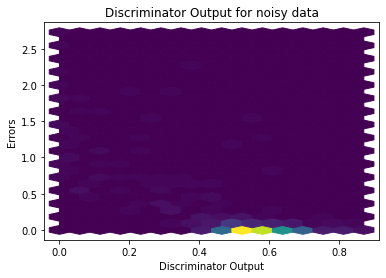

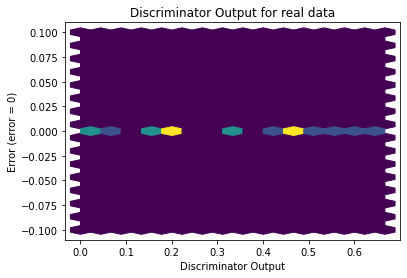

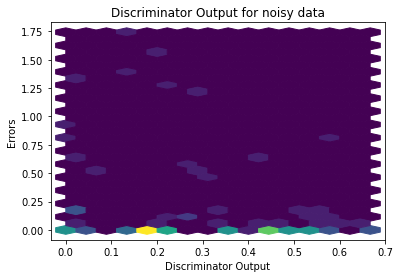

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


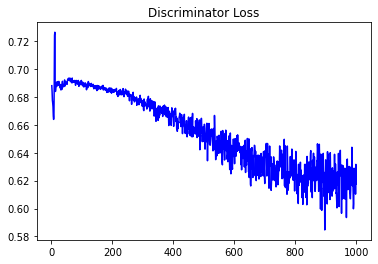

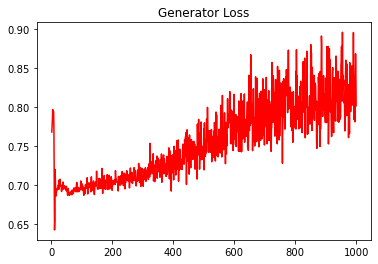

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4133168840301223


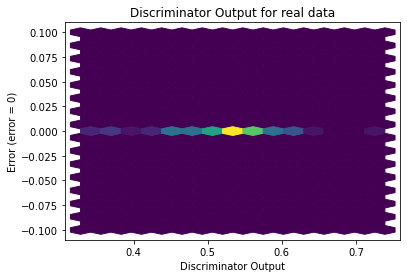

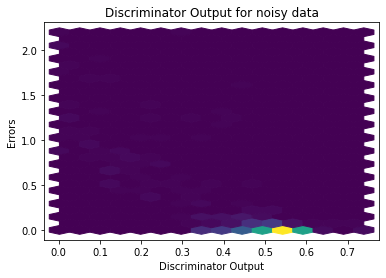

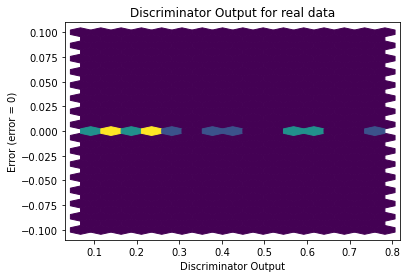

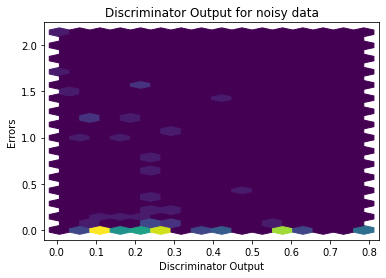

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


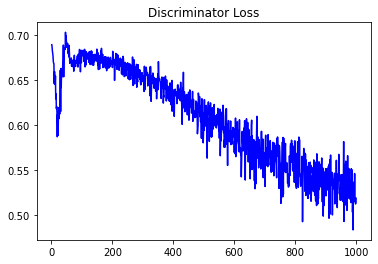

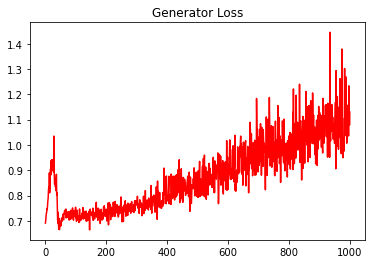

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5434388250787743


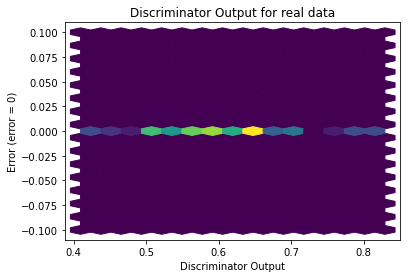

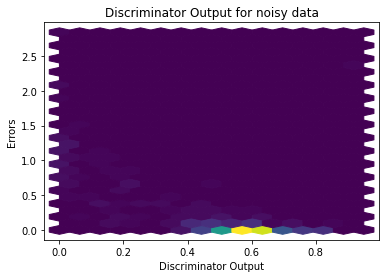

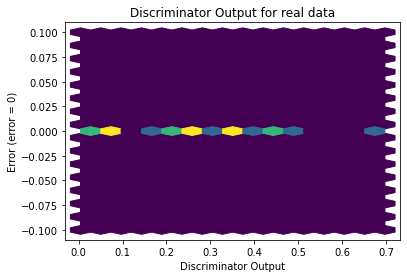

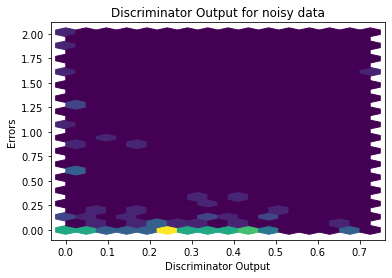

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1247]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4574]], requires_grad=True)
